# House Sales in King County, USA

## House Price Prediction Analysis by Regression

# Project - House Sales in King County, USA


#### Objective:

Let's Predict house price using **Linear regression**.

Linear regression is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.   It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction. 

#### Hypothesis representation

We will use $x_i$ to denote the independent variable and $y_i$ to denote dependent variable. A pair of $(x_i,y_i)$ is called training example. The subscripe $i$ in the notation is simply index into the training set. We have $m$ training example then $i = 1,2,3,...m$. 

The goal of supervised learning is to learn a *hypothesis function $h$*, for a given training set that can used to estimate $y$ based on $x$. So hypothesis fuction represented as 

$$h_\theta(x_{i}) = \theta_0 + \theta_1x_i$$   
$\theta_0,\theta_1$ are parameter of hypothesis.This is equation for **Simple / Univariate Linear regression**. 

For **Multiple Linear regression** more than one independent variable exit then we will use $x_{ij}$ to denote indepedent variable and $y_{i}$ to denote dependent variable. We have $n$ independent variable then $j=1,2,3 ..... n$. The hypothesis function represented as

$$h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn}$$
$\theta_0,\theta_1,....\theta_j....\theta_n$ are parameter of hypothesis,
$m$ Number of training examples,
$n$ Number of independent variable,
$x_{ij}$ is $i^{th}$ training exaple of $j^{th}$ feature.



#### Steps:



In [126]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from IPython.display import Image
from sklearn import linear_model, datasets,metrics
from sklearn.model_selection import train_test_split
import scipy.stats as stats

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

import cartopy.crs as ccrs
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
def backward_elimination_cv(X_train_, y_train_, X_test_, y_test_,selected_reg):
    baseline_rmse_ = np.sqrt(metrics.mean_squared_error(y_test_, selected_reg.fit(X_train_, y_train_).predict(X_test_)))
    min_rmse_ = baseline_rmse_
    should_remove_ = ""
    X_train_return_=X_train_
    X_test_return_=X_test_
    
    for temp_col_ in X_train_.columns:
        temp_X_train_ = X_train_.drop(temp_col_, axis=1)
        temp_X_test_ = X_test_.drop(temp_col_, axis=1)
        temp_rmse_ = np.sqrt(metrics.mean_squared_error(y_test_, selected_reg.fit(temp_X_train_, y_train_).predict(temp_X_test_)))
        if temp_rmse_ < min_rmse_:
            min_rmse_ = temp_rmse_
            should_remove_ = temp_col_
    if should_remove_ != "":
        X_train_return_=X_train_.drop(should_remove_, axis=1)
        X_test_return_ = X_test_.drop(should_remove_, axis=1)
    print(should_remove_, min_rmse_, len(X_train_return_.columns))
    return(X_train_return_,X_test_return_,should_remove_) 

def auto_backward_elimination_cv(X_train_initial_, y_train_, X_test_initial_, y_test_,selected_reg):
    temp_X_train_=X_train_initial_
    temp_X_test_=X_test_initial_
    z=len(temp_X_train_.columns.tolist())
    drop_list=[]
    for i in range(z):
        temp_X_train_,temp_X_test_,should_remove_=backward_elimination_cv(temp_X_train_,y_train_,temp_X_test_,y_test_,selected_reg)
        if should_remove_=="":
            break
        drop_list.append(should_remove_)

    return(drop_list)

In [4]:
houseDF=pd.read_table("kc_house_data.csv",sep=',')

#### 19 house features plus the price and the id columns, along with 21613 observations.
1.id - Unique ID for each home sold 

2.date - Date of the home sale 

3.price - Price of each home sold 

4.bedrooms - Number of bedrooms 

5.bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 

6.sqft_living - Square footage of the apartments interior living space 

7.sqft_lot - Square footage of the land space 

8.floors - Number of floors 

9.waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 

10.view - An index from 0 to 4 of how good the view of the property was 

11.condition - An index from 1 to 5 on the condition of the apartment, 

12.grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

13.sqft_above - The square footage of the interior housing space that is above ground level 

14.sqft_basement - The square footage of the interior housing space that is below ground level 

15.yr_built - The year the house was initially built 

16.yr_renovated - The year of the house’s last renovation 

17.zipcode - What zipcode area the house is in 

18.lat - Lattitude 

19.long - Longitude 

20.sqft_living15 - The mean square footage of interior housing living space for the nearest 15 neighbors 

21.sqft_lot15 - The mean square footage of the land lots of the nearest 15 neighbors

### Before data transformation, we will check if there are nulls/bad data, or any duplicates in the file.

In [5]:
# Check Nulls
print(10*'-'+'Check Nulls'+10*'-')
print(houseDF.isnull().sum())
print(50*'-')
# Check overall dups
print(10*'-'+'Check overall dups'+10*'-')
print(houseDF[houseDF.duplicated()])
print(50*'-')
#check unique values
print(10*'-'+'Check unique values'+10*'-')
houseDFcheck=houseDF.copy()
houseDFcheck["index"]=houseDFcheck.index
print(houseDFcheck.nunique())
print(50*'-')

----------Check Nulls----------
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
--------------------------------------------------
----------Check overall dups----------
Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]
--------------------------------------------------
----------Check unique values----------
id               21436
date               372
price             4028
bedrooms            13
bathrooms           3

In [131]:
# houseDF[houseDF.duplicated(subset='id',keep=False)].sort_values(by=["id","date"])
houseDF.describe()
houseDF.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


AttributeError: 'numpy.ndarray' object has no attribute 'savefig'

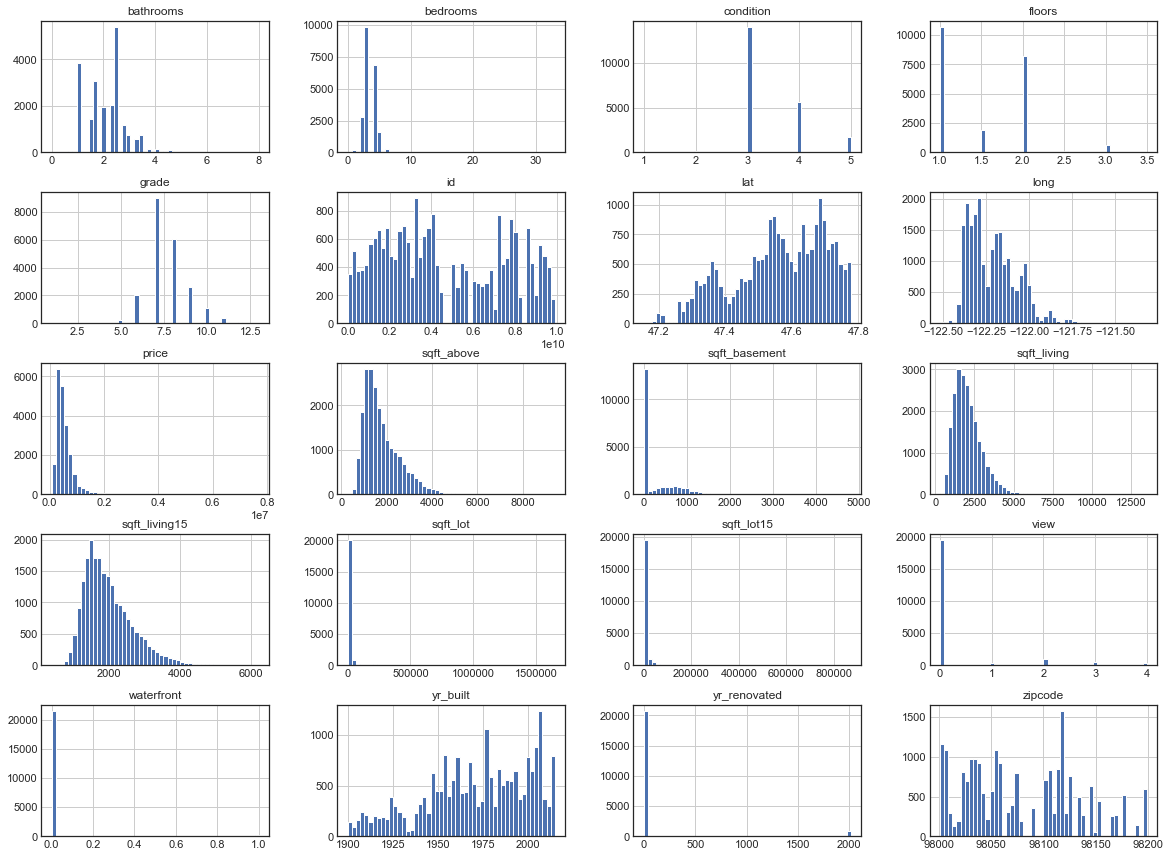

In [136]:
fig=houseDF.hist(bins=50, figsize=(20,15))
# plt.savefig("attribute_histogram_plots")
# plt.show()
fig.savefig('hist.png', dpi=125)

<Figure size 432x288 with 0 Axes>

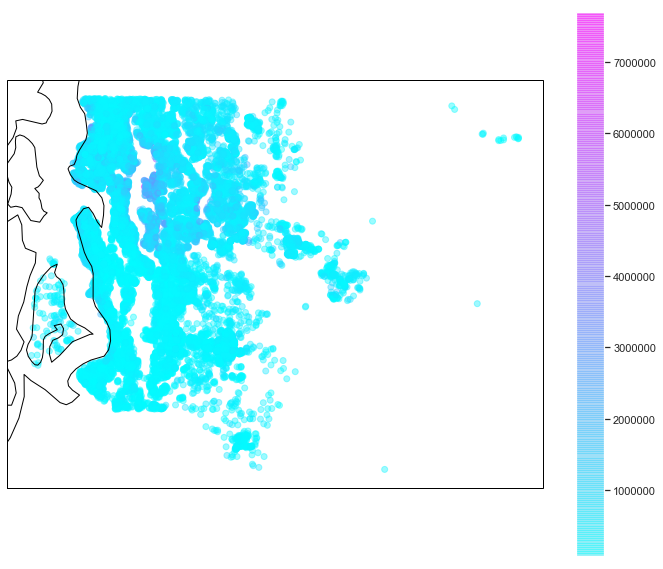

In [53]:
fig, ax = plt.subplots(0,0)
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection=ccrs.Mercator()) # Map projection
ax.coastlines(resolution='10m') 
# cm = plt.cm.get_cmap('jet')
# cm = plt.cm.get_cmap('Wistia')
cm = plt.cm.get_cmap('cool')
# cm = plt.cm.get_cmap('winter')
sc=plt.scatter(houseDF["long"], houseDF["lat"],alpha=0.4, transform=ccrs.Geodetic(), c=houseDF["price"], cmap=cm)
plt.colorbar(sc)
plt.show()
# plt.save('location_price.png')

# figs,axis=plt.subplots(figsize=(10, 12))
fig.savefig('location_price.png', dpi=125)

In [9]:
corr_matrix = houseDF.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [10]:
def highlight_vals(val, cutoff_pos=0.80, cutoff_neg=-0.80, color1='lightgreen', color2='red'):
    if val > cutoff_pos:
        return 'background-color: {}'.format(color1)
    elif val < cutoff_neg:
        return 'background-color: {}'.format(color2)
    else:
        return ''
corr_matrix.style.applymap(highlight_vals)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1,-0.0167622,0.00128628,0.00516023,-0.0122578,-0.132109,0.0185252,-0.00272109,0.0115924,-0.0237826,0.00813045,-0.0108421,-0.00515113,0.0213801,-0.016907,-0.00822432,-0.00189093,0.0207986,-0.002901,-0.138798
price,-0.0167622,1,0.30835,0.525138,0.702035,0.0896609,0.256794,0.266369,0.397293,0.0363618,0.667434,0.605567,0.323816,0.0540115,0.126434,-0.0532029,0.307003,0.0216262,0.585379,0.0824472
bedrooms,0.00128628,0.30835,1,0.515884,0.576671,0.0317032,0.175429,-0.00658248,0.0795319,0.0284721,0.356967,0.4776,0.303093,0.154178,0.0188408,-0.152668,-0.00893101,0.129473,0.391638,0.0292442
bathrooms,0.00516023,0.525138,0.515884,1,0.754665,0.0877397,0.500653,0.0637436,0.187737,-0.124982,0.664983,0.685342,0.28377,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.0871754
sqft_living,-0.0122578,0.702035,0.576671,0.754665,1,0.172826,0.353949,0.103818,0.284611,-0.0587526,0.762704,0.876597,0.435043,0.318049,0.0553629,-0.19943,0.0525295,0.240223,0.75642,0.183286
sqft_lot,-0.132109,0.0896609,0.0317032,0.0877397,0.172826,1,-0.00520099,0.0216037,0.0747101,-0.00895825,0.113621,0.183512,0.0152862,0.0530804,0.00764351,-0.129574,-0.0856828,0.229521,0.144608,0.718557
floors,0.0185252,0.256794,0.175429,0.500653,0.353949,-0.00520099,1,0.0236983,0.0294438,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.0063384,-0.0591206,0.0496141,0.125419,0.279885,-0.0112692
waterfront,-0.00272109,0.266369,-0.00658248,0.0637436,0.103818,0.0216037,0.0236983,1,0.401857,0.0166532,0.0827749,0.0720746,0.0805879,-0.0261611,0.0928848,0.0302847,-0.0142738,-0.0419102,0.0864631,0.0307033
view,0.0115924,0.397293,0.0795319,0.187737,0.284611,0.0747101,0.0294438,0.401857,1,0.0459897,0.251321,0.167649,0.276947,-0.0534399,0.103917,0.0848269,0.00615673,-0.0783997,0.280439,0.0725746
condition,-0.0237826,0.0363618,0.0284721,-0.124982,-0.0587526,-0.00895825,-0.263768,0.0166532,0.0459897,1,-0.144674,-0.158214,0.174105,-0.361417,-0.0606178,0.00302552,-0.014941,-0.1065,-0.0928243,-0.00340552


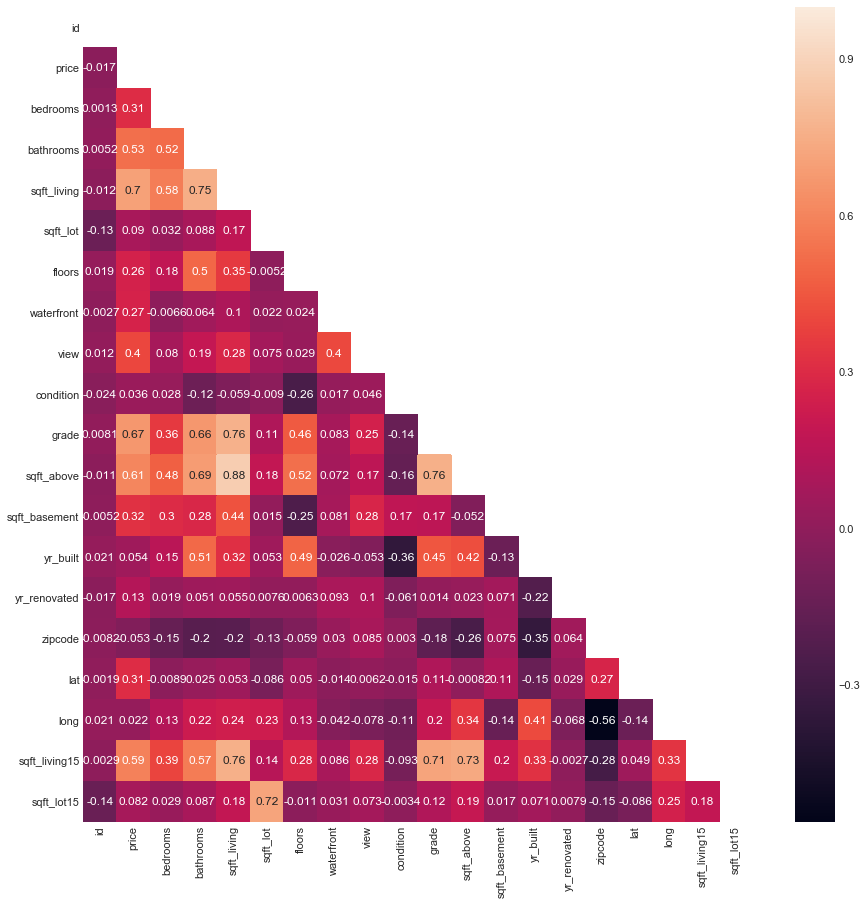

In [54]:

plt.style.use('seaborn-white')
fig,ax=plt.subplots(1,1,figsize=(15,15))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix,annot=True, mask=mask, ax= ax)
plt.savefig('heatmap.png', dpi=125)

In [12]:
correlations = houseDF.corr()
correlations = correlations["price"].sort_values(ascending=False)
features = correlations.index[1:6]
correlations.head(10)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
Name: price, dtype: float64

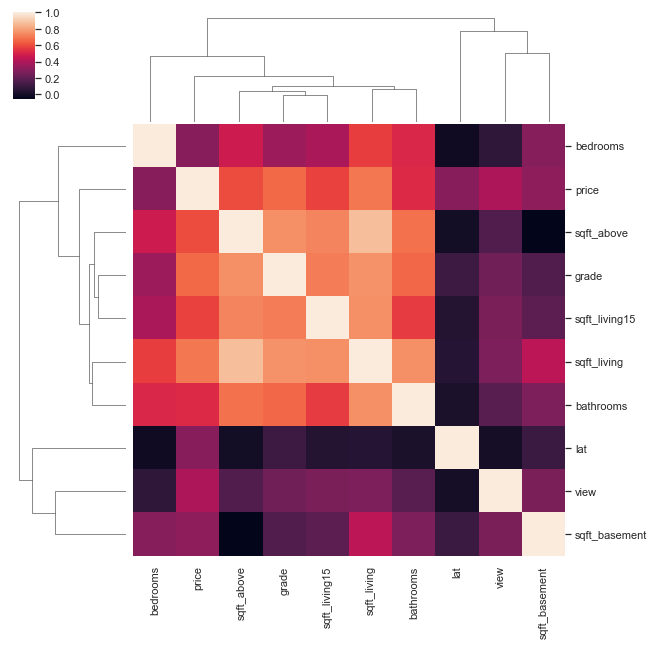

In [13]:
# Correlation Matrix - Cluster mapping

k = 10
cols = corr_matrix.nlargest(k , 'price')['price'].index
cm = np.corrcoef(houseDF[cols].values.T)
sns.set(font_scale = 1.00)
hm = sns.clustermap(cm ,cbar = True,square = True,
                 yticklabels = cols.values, xticklabels = cols.values)

id, here denotes the particular house, and we noticed there are duplicated ids, which means the house was sold multiple times during the time span of these dataset. So we can include date and transform it to a indenpendant numerical variable for the house price prediction.

Another thing to notice, location matters, and in this dataset, we only have 70 distinct zipcode, so we can categorize the location into these 70 dummy variables, and then get rid of "lat" and "long", which can be hard to interpret in the model.


### Feature Engineering

In [94]:
#houseDF.drop(["id","lat","long","sqft_living15","sqft_lot15"],axis=1).head()
houseDF=pd.read_table("kc_house_data.csv",sep=',')
houseDF.drop(["id","lat","long"],axis=1).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [95]:

# Categorize Zipcode variable

label_encoder_zip = LabelEncoder()
onehot_encoder_zip= OneHotEncoder()

# fit the label_encoder
label_encoder_zip.fit(houseDF["zipcode"])

# generate the zip label and fit and transform the onehot_encoder
label_encoded_zip_label=['zip_'+ np.array2string(zip_c) for zip_c in label_encoder_zip.classes_]
onehot_encoded_zip= onehot_encoder_zip.fit_transform(label_encoder_zip.transform(houseDF["zipcode"]).reshape(-1,1))

# generate zip_columns dateframe
zip_encoded_df = pd.DataFrame(data=onehot_encoded_zip.toarray(),columns=label_encoded_zip_label)

#append new zip_columns into dataframe
# houseDF.join(zip_encoded_df)

C:\Users\yunfebai\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


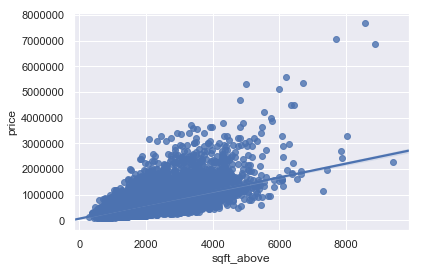

In [16]:
sns.regplot(y=houseDF.price, x=houseDF.sqft_above, fit_reg = True)

C:\Users\yunfebai\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


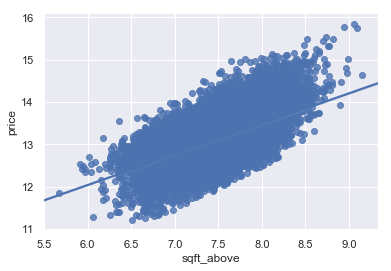

In [17]:
sns.regplot(y=np.log(houseDF.price), x=np.log(houseDF.sqft_above), fit_reg = True)

In [19]:
# houseDF.price = np.log(houseDF.price)
# houseDF.sqft_above = np.log(houseDF.sqft_above)
# #houseDF.sqft_basement = np.log(houseDF.sqft_basement)
# houseDF.sqft_living = np.log(houseDF.sqft_living)
# houseDF.sqft_living15 = np.log(houseDF.sqft_living15)
# houseDF.sqft_lot = np.log(houseDF.sqft_lot)
# houseDF.sqft_lot15 = np.log(houseDF.sqft_lot15)

In [21]:
#Transform Date column into a numerical variable
# one way
# date=houseDF["date"].str.extract('([0-9][0-9][0-9][0-9])([0-9][0-9])([0-9][0-9])', expand=True)
# date1=pd.to_numeric(date[0])*365+pd.to_numeric(date[1])*30+pd.to_numeric(date[2])
#Another way: to date and - 1900-01-01 for days
date_1=houseDF["date"].str.extract('(?P<year>[0-9][0-9][0-9][0-9])(?P<month>[0-9][0-9])(?P<day>[0-9][0-9])',expand=True)
date_2=pd.DataFrame(data=pd.to_datetime(date_1),columns=['date'])
date_2['BaseDatetime']=pd.to_datetime('1900-01-01')
date_2['date_in_days']=date_2['date']-date_2['BaseDatetime']
date=pd.DataFrame(data=(date_2['date_in_days'] / np.timedelta64(1, 'D')).astype(int),columns=['date_in_days'])

In [22]:
# produce final feature DF
model_feed=houseDF.drop(["id","lat","long","date","zipcode"],axis=1).join(date["date_in_days"]).join(zip_encoded_df)
model_feed_X=model_feed.drop('price',axis=1)
model_feed_y=model_feed['price']
X_train, X_test, y_train, y_test = train_test_split(model_feed_X, model_feed_y, test_size=0.15, random_state=101)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

## Linear Regression Model

In [23]:
model = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade+ sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15", 
            data=houseDF).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     2913.
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        15:29:55   Log-Likelihood:            -2.9614e+05
No. Observations:               21613   AIC:                         5.923e+05
Df Residuals:                   21598   BIC:                         5.924e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.195e+06   1.38e+05     44.754

<b>The below charts show that when the sqrt_living increases, sqrt_lot and bedrooms or bathrooms/bedrooms increases. However, the floors, bedrooms and bathrooms/bedrooms or sqrt_living does not have a similar relationship.</b>

[(0, 250000)]

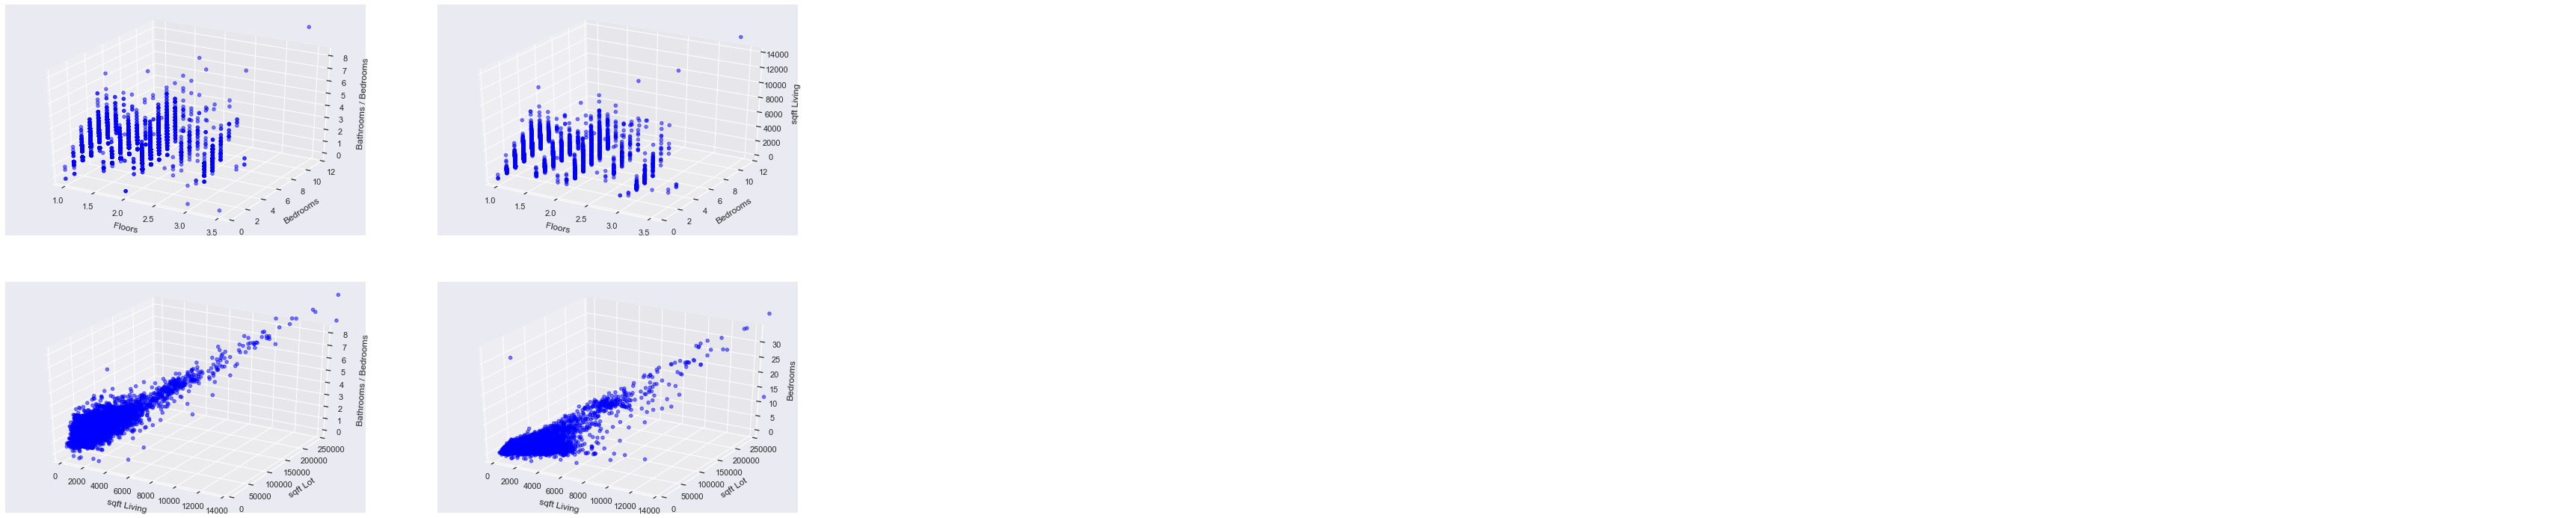

In [24]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,1, projection="3d")
ax.scatter(X_train['floors'],X_train['bedrooms'],X_train['bathrooms'],c="blue",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(X_train['floors'],X_train['bedrooms'],X_train['sqft_living'],c="blue",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])

ax=fig.add_subplot(2,2,3, projection="3d")
ax.scatter(X_train['sqft_living'],X_train['sqft_lot'],X_train['bathrooms'],c="blue",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='\nBathrooms / Bedrooms')
ax.set(ylim=[0,250000])

ax=fig.add_subplot(2,2,4, projection="3d")
ax.scatter(X_train['sqft_living'],X_train['sqft_lot'],X_train['bedrooms'],c="blue",alpha=.5)
ax.set(xlabel='\n sqft Living',ylabel='\nsqft Lot',zlabel='Bedrooms')
ax.set(ylim=[0,250000])

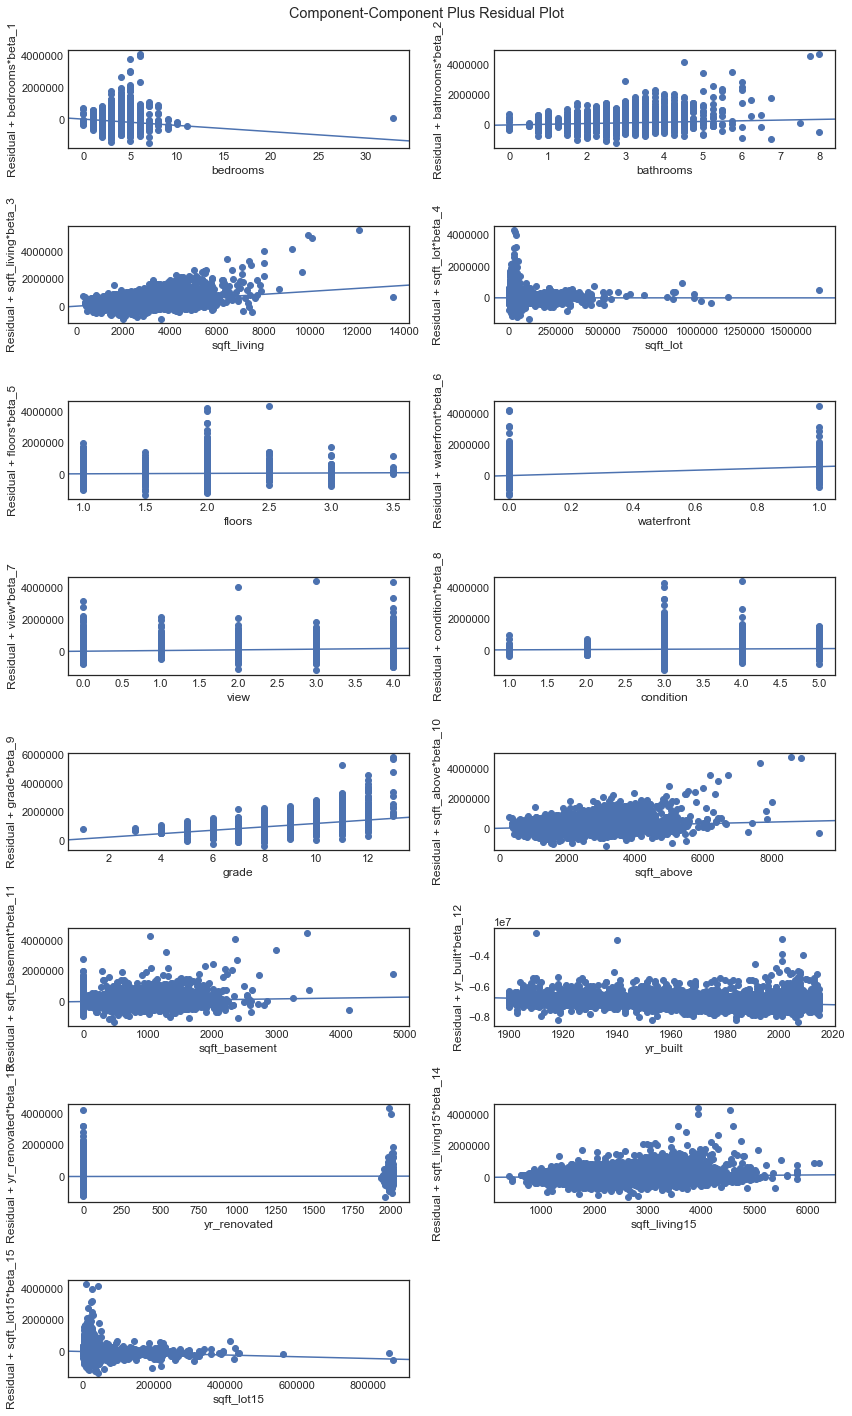

In [97]:
fig = plt.figure(figsize=(12,20))
fig = sm.graphics.plot_ccpr_grid(model, fig=fig)
fig.savefig("plot_ccpr_grid")

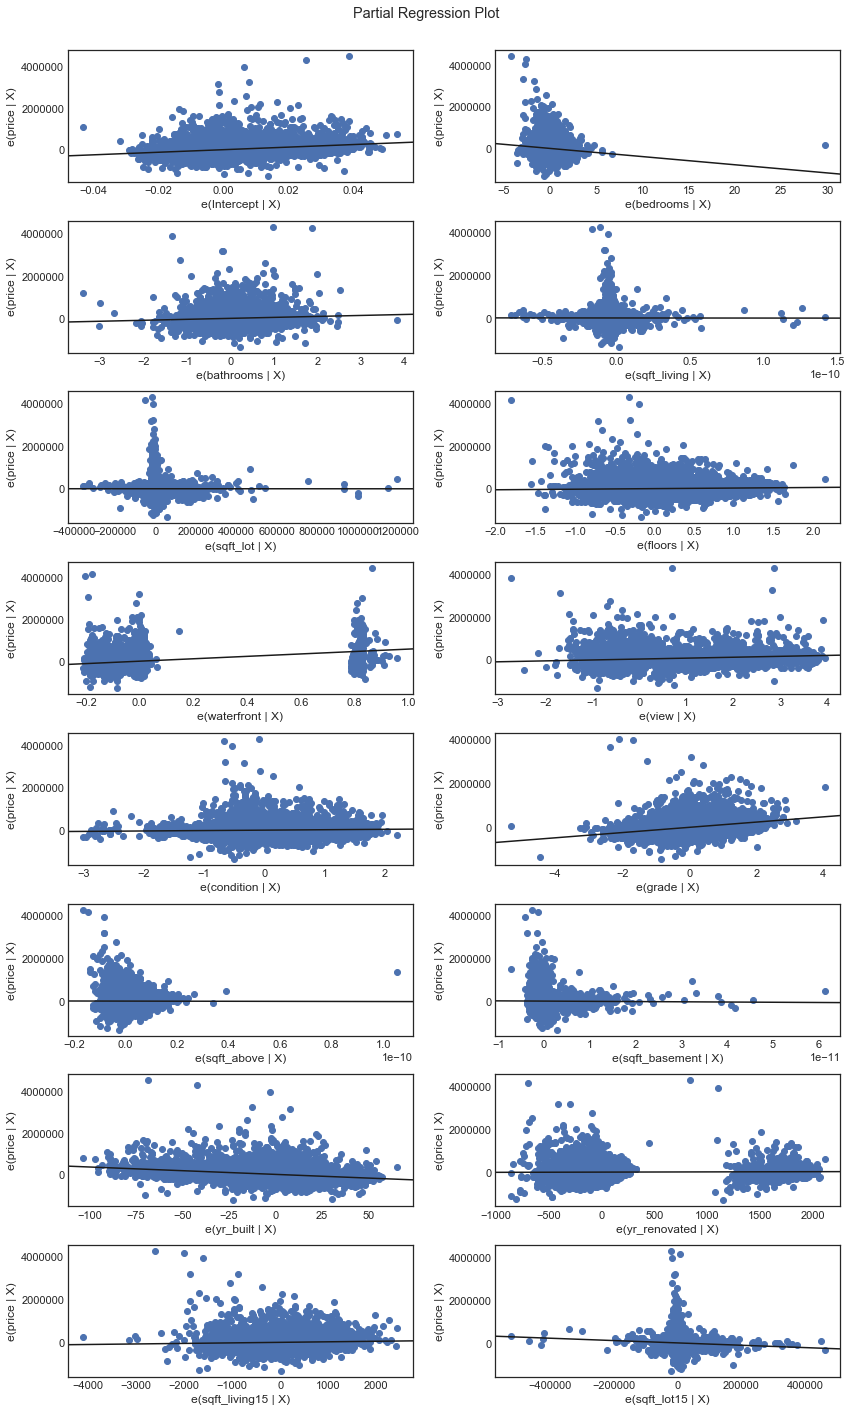

In [96]:
fig = plt.figure(figsize=(12,20))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig.savefig("plot_partregress_grid")

In [100]:
# Now fit into Linear Regression Model

l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

# Test the model performance 
y_pred_lr = l_reg.predict(X_test)
R2=r2_score(y_test, y_pred_lr)
n=len(X_test)
k=len(X_test.columns.tolist())
adj_R2 = 1-(1-R2)*(n-1)/(n-k-1)
print('Linear Regression R squared": {} and Adjusted R squared: {}' .format(R2,adj_R2))

lin_mse = mean_squared_error(y_pred_lr, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: {}' .format(lin_rmse))

Linear Regression R squared": 0.804746260356776 and Adjusted R squared: 0.7994239714156295
Linear Regression RMSE: 170731.86257225374


### Regression Model Suitability

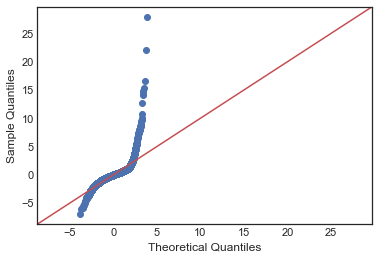

In [102]:
# fig = plt.figure(figsize=(12,20))
fig=sm.qqplot(y_train-l_reg.predict(X_train), fit=True, line='45')
fig.savefig("qqplot")

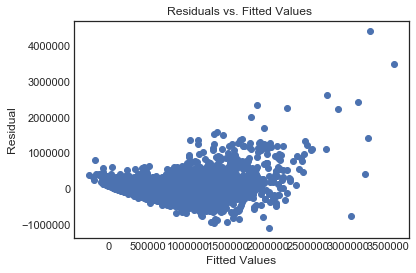

In [105]:
plt.scatter(l_reg.predict(X_train), y_train-l_reg.predict(X_train))
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residuals vs. Fitted Values ")
plt.savefig("res vs fit")

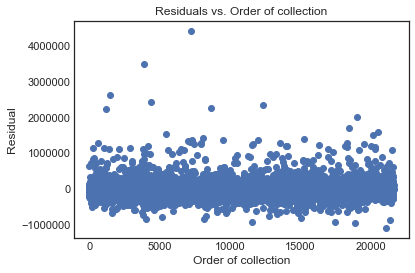

In [106]:
plt.scatter(X_train.index, y_train-l_reg.predict(X_train))
plt.xlabel("Order of collection")
plt.ylabel("Residual")
plt.title("Residuals vs. Order of collection")
plt.savefig("Residuals vs Order of collection")



### Test prediction

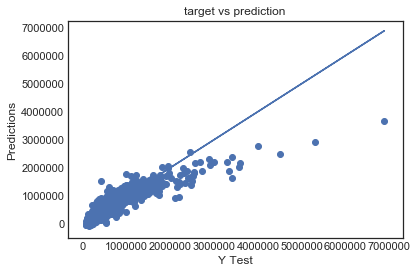

In [107]:
# Add a 45 line
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Y Test')
plt.ylabel('Predictions')
plt.title("target vs prediction")
plt.savefig("target vs prediction")

In [34]:
# Now get the best model in the LinearRegression
l_reg = LinearRegression()

drop_list_lr=auto_backward_elimination_cv(X_train_s, y_train_s, X_test_s, y_test_s,l_reg)

zip_98070 151415.58960403796 85
zip_98010 151281.45904059365 84
zip_98042 151256.71219930286 83
zip_98198 151233.17732804304 82
zip_98001 151221.3972159437 81
zip_98002 151197.7108830722 80
 151197.7108830722 80


In [35]:
# Now test the best model
l_reg = LinearRegression()
X_train_drop=X_train.drop(drop_list_lr,axis=1)
X_test_drop=X_test.drop(drop_list_lr,axis=1)
l_reg.fit(X_train_drop, y_train)
# Test the model performance 
y_pred_lr_bm = l_reg.predict(X_test_drop)
R2=r2_score(y_test, y_pred_lr_bm)
n=len(X_test_drop)
k=len(X_test_drop.columns.tolist())
adj_R2 = 1-(1-R2)*(n-1)/(n-k-1)
print('Linear Regression R squared": {} and Adjusted R squared: {}' .format(R2,adj_R2))

lin_mse = mean_squared_error(y_pred_lr_bm, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: {}' .format(lin_rmse))

Linear Regression R squared": 0.804467586838618 and Adjusted R squared: 0.7995189651831575
Linear Regression RMSE: 170853.65661459917


##  Random Forest Regression Model

In [57]:
# Now fit into the Random Forest Regression model

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
# Test the model performance 
y_pred_rf = forest_reg.predict(X_test)
R2=r2_score(y_test, y_pred_rf)
n=len(X_test)
k=len(X_test.columns.tolist())
adj_R2 = 1-(1-R2)*(n-1)/(n-k-1)
print('Random Forest Regression R squared": {} and Adjusted R squared: {}' .format(R2,adj_R2))
lin_mse = mean_squared_error(y_pred_rf, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Random Forest Regression RMSE: {}' .format(lin_rmse))

Random Forest Regression R squared": 0.8444815540871461 and Adjusted R squared: 0.8402423825028338
Random Forest Regression RMSE: 152372.23990008477


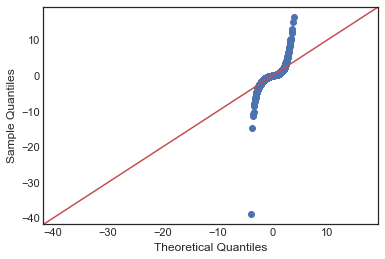

In [108]:
fig=sm.qqplot(y_train-forest_reg.predict(X_train), fit=True, line='45')
fig.savefig("qqplot_rf")

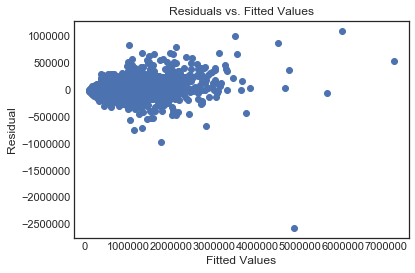

In [109]:
plt.scatter(forest_reg.predict(X_train), y_train-forest_reg.predict(X_train))
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residuals vs. Fitted Values")
plt.savefig("res vs fit")

In [90]:
# plt.scatter(f["predicted_price"], f["residue"])
# plt.xlabel("Fitted Values")
# plt.ylabel("Residual")
# plt.title("Residuals vs. Fitted Values")

In [88]:
# p=forest_reg.predict(X_train)
# r=y_train-p
# f=X_train.join(y_train).join(pd.Series(p,name="predicted_price")).join(pd.Series(r,name="residue"))
# f=f[f["residue"]>-2500000]
# # X_train[X_train.index==12777]
# # y_train[y_train.index==12777]

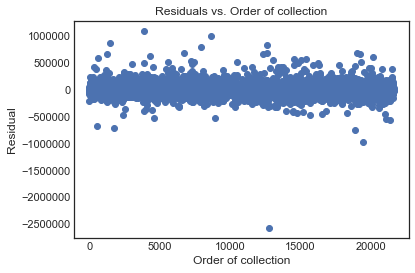

In [110]:
plt.scatter(X_train.index, y_train-forest_reg.predict(X_train))
plt.xlabel("Order of collection")
plt.ylabel("Residual")
plt.title("Residuals vs. Order of collection")
plt.savefig("Residuals vs Order of collection")

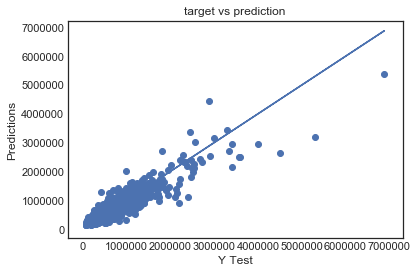

In [111]:
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Predictions')
plt.title("target vs prediction")
plt.savefig("target vs prediction")

In [48]:
# Now get the best model Random Forest Regression 

forest_reg = RandomForestRegressor(random_state=42)


drop_list_rf=auto_backward_elimination_cv(X_train_s, y_train_s, X_test_s, y_test_s, forest_reg)

floors 147709.30061220843 85
zip_98014 147171.7010903322 84
 147171.7010903322 84


In [55]:
# Now test the best Random Forest Regression model

forest_reg = RandomForestRegressor(random_state=42)
X_train_drop=X_train.drop(drop_list_rf,axis=1)
X_test_drop=X_test.drop(drop_list_rf,axis=1)
forest_reg.fit(X_train_drop, y_train)
# Test the model performance 
y_pred_rf_bm = forest_reg.predict(X_test_drop)
R2=r2_score(y_test, y_pred_rf_bm)
n=len(X_test_drop)
k=len(X_test_drop.columns.tolist())
adj_R2 = 1-(1-R2)*(n-1)/(n-k-1)
print('Random Forest Regression R squared": {} and Adjusted R squared: {}' .format(R2,adj_R2))
lin_mse = mean_squared_error(y_pred_rf_bm, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Random Forest Regression RMSE: {}' .format(lin_rmse))

Random Forest Regression R squared": 0.8427197114506217 and Adjusted R squared: 0.8385348700701505
Random Forest Regression RMSE: 153232.90906618268


###  Gradient Boosting Regression Model

In [113]:
# Now fit into the Gradient Boosting Regression model


gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
# Test the model performance 
y_pred_gb = gb_reg.predict(X_test)
R2=r2_score(y_test, y_pred_gb)
n=len(X_test)
k=len(X_test.columns.tolist())
adj_R2 = 1-(1-R2)*(n-1)/(n-k-1)
print('Gradient Boosting Regression R squared": {} and Adjusted R squared: {}' .format(R2,adj_R2))
lin_mse = mean_squared_error(y_pred_gb, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Gradient Boosting Regression RMSE: {}' .format(lin_rmse))

Gradient Boosting Regression R squared": 0.842877155566486 and Adjusted R squared: 0.8385942507736865
Gradient Boosting Regression RMSE: 153156.19360227068


### Regression Model Suitability

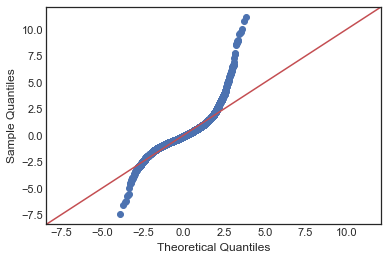

In [114]:
fig=sm.qqplot(y_train-gb_reg.predict(X_train), fit=True, line='45')
fig.savefig("qqplot_gbr")

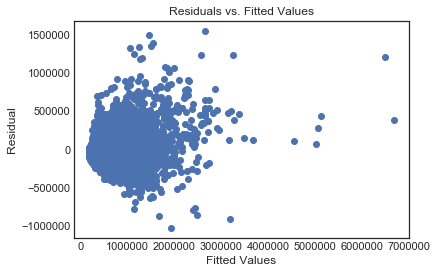

In [115]:
plt.scatter(gb_reg.predict(X_train), y_train-gb_reg.predict(X_train))
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residuals vs. Fitted Values")
plt.savefig("res vs fit")

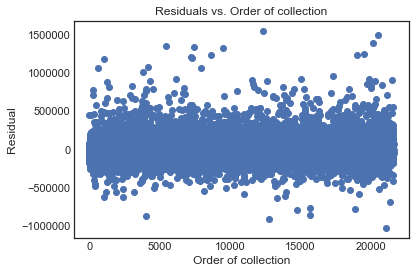

In [116]:
plt.scatter(X_train.index, y_train-gb_reg.predict(X_train))
plt.xlabel("Order of collection")
plt.ylabel("Residual")
plt.title("Residuals vs. Order of collection")
plt.savefig("Residuals vs Order of collection")

### Test prediction

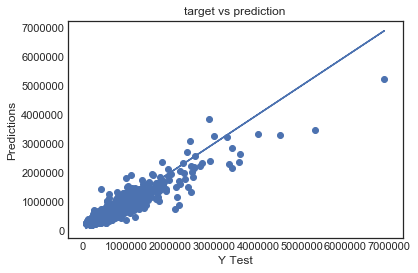

In [118]:
plt.plot(y_test, y_test)
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Y Test')
plt.ylabel('Predictions')
plt.title("target vs prediction")
plt.savefig("target vs prediction")

In [45]:
# Now get the best model GradientBoostingRegressor Regression 

gb_reg = GradientBoostingRegressor()

drop_list_gb=auto_backward_elimination_cv(X_train_s, y_train_s, X_test_s, y_test_s, gb_reg)

zip_98199 144944.11451810016 85
zip_98168 144771.20803533407 84
zip_98010 144638.18127877612 83
zip_98118 144628.86361870842 82
zip_98007 144472.67931737058 81
zip_98148 144494.5377835889 80
zip_98070 144472.1169747466 79
zip_98019 144585.93711408865 78
zip_98166 144646.31734586004 77
zip_98108 144630.3670556581 76
zip_98122 144580.44216644487 75
zip_98133 144530.38135528885 74
zip_98126 144618.1344690775 73
zip_98045 144617.16114211394 72
zip_98072 144578.85255745045 71
zip_98029 144624.71538761386 70
 144578.11629798863 70


In [46]:
# Now we test the best model of the Gradient Boosting Regression model

gb_reg = GradientBoostingRegressor()
X_train_drop=X_train.drop(drop_list_gb,axis=1)
X_test_drop=X_test.drop(drop_list_gb,axis=1)

gb_reg.fit(X_train_drop, y_train)
# Test the model performance 
y_pred_gb_bm = gb_reg.predict(X_test_drop)
R2=r2_score(y_test, y_pred_gb_bm)
n=len(X_test_drop)
k=len(X_test_drop.columns.tolist())
adj_R2 = 1-(1-R2)*(n-1)/(n-k-1)
print('Gradient Boosting Regression R squared": {} and Adjusted R squared: {}' .format(R2,adj_R2))
lin_mse = mean_squared_error(y_pred_gb_bm, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Gradient Boosting Regression RMSE: {}' .format(lin_rmse))

Gradient Boosting Regression R squared": 0.8421516659988062 and Adjusted R squared: 0.8386671553144531
Gradient Boosting Regression RMSE: 153509.37348032038


In [ ]:
# feature_labels = np.array(X_test.columns.tolist())
# importance = gb_reg.feature_importances_
# feature_indexes_by_importance = importance.argsort()
# for index in feature_indexes_by_importance:
#     print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

In [ ]:
# results=pd.concat([pd.Series(list(y_test),name='price',dtype='int32'),
#                    pd.Series(y_pred_lr,name='lr_pred',dtype='int32'),
#                    pd.Series(y_pred_lr_bm,name='lr_pred_bm',dtype='int32'),
#                    pd.Series(y_pred_rf,name='rf_pred',dtype='int32'),
#                    pd.Series(y_pred_rf_bm,name='rf_pred_bm',dtype='int32'),
#                    pd.Series(y_pred_gb,name='gb_pred',dtype='int32'),
#                    pd.Series(y_pred_gb_bm,name='gb_pred_bm',dtype='int32')],axis=1)
# results
